# Finance Operations EDA — Synthetic Data Project
### Exploratory Data Analysis of Synthetic Financial Operations Data

## Project Overview
This notebook analyzes synthetic financial operations data for a mock banking environment.  
It simulates monthly revenue, cost, absolute profit, and profit margin across different products and client segments.

## Why This Notebook is Valuable
- Demonstrates a complete data analysis workflow  
- Shows skills in Python (Pandas, NumPy, Matplotlib, Seaborn), data cleaning, and visualization  
- Professional, GitHub-ready structure  
- Easily adaptable to real banking datasets

---

## Objectives
1. Load and explore the synthetic finance dataset  
2. Clean and prepare the data for analysis  
3. Compute Absolute Profit (CHF) and Profit Margin (%)  
4. Create insightful visualizations: trends, product performance, profitability  
5. Interpret results like a financial analyst  
6. Ensure clarity for collaborators and recruiters

## 1. Libraries / Settings

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
from pathlib import Path

# Plot style
sns.set_style("whitegrid")        # Clean gridlines
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.size"] = 12
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 10
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10

## 2. Load the Processed Dataset

We previously generated synthetic data with `create_synthetic_data.py` and processed it to compute **AbsoluteProfitCHF** and **ProfitMargin**.  

**Steps:**
1. Define project paths for raw and processed data  
2. Load processed CSV into a DataFrame
3. Convert Month to datetime and set it as index (for time-series plots)
4. Preview the data

In [16]:
# -------------------------------
# Define project paths
# -------------------------------

CWD = Path.cwd()  # Current working directory (where Jupyter started)
PROJECT_ROOT = CWD.parent  # Adjust if notebook nested deeper

# Paths for raw and processed data
raw_csv_path = PROJECT_ROOT / "data" / "raw" / "finance_operations.csv"
processed_csv_path = PROJECT_ROOT / "data" / "processed" / "finance_operations_processed.csv"

# Ensure processed folder exists
(processed_csv_path.parent).mkdir(parents=True, exist_ok=True)

# -------------------------------
# Load processed CSV
# -------------------------------

df = pd.read_csv(processed_csv_path, parse_dates=["Month"])
df.set_index("Month", inplace=True)
df.sort_index(inplace=True)

# -------------------------------
# Show first rows
# -------------------------------

display(df.head(8))

,Product,ClientSegment,RevenueCHF,CostCHF,AbsoluteProfitCHF,ProfitMargin
Month,,,,,,
2024-01-01,Equity,Private,238752,113097,125655,0.5263
2024-01-01,Equity,Corporate,303950,115598,188352,0.6197
2024-01-01,Equity,Institutional,330631,144646,185985,0.5625
2024-01-01,Bonds,Private,384326,119245,265081,0.6897
2024-01-01,Bonds,Corporate,333727,114208,219519,0.6578
2024-01-01,Bonds,Institutional,486757,129957,356800,0.7330
2024-01-01,ETF,Private,401525,162527,238998,0.5952
2024-01-01,ETF,Corporate,245408,118040,127368,0.5190


## 3. Data Cleaning & Monthly Analysis

The processed CSV already contains:

- `RevenueCHF`  
- `CostCHF`  
- `AbsoluteProfitCHF` (RevenueCHF – CostCHF)  
- `ProfitMargin` (ratio of AbsoluteProfitCHF to RevenueCHF)

Since the processed CSV is already clean, this section will:
1. Verify data structure and types, and check for missing values
2. Proceed to monthly aggregation


### 3.1 Inspect data

In [14]:
print("Data Info:")
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())

# Quick sanity check of ranges
df.describe()[["RevenueCHF", "CostCHF", "AbsoluteProfitCHF", "ProfitMargin"]]

Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 2024-01-01 to 2024-12-01
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product            108 non-null    object 
 1   ClientSegment      108 non-null    object 
 2   RevenueCHF         108 non-null    int64  
 3   CostCHF            108 non-null    int64  
 4   AbsoluteProfitCHF  108 non-null    int64  
 5   ProfitMargin       108 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 5.9+ KB
None

Missing values per column:
Product              0
ClientSegment        0
RevenueCHF           0
CostCHF              0
AbsoluteProfitCHF    0
ProfitMargin         0
dtype: int64


,RevenueCHF,CostCHF,AbsoluteProfitCHF,ProfitMargin
count,108.000000,108.000000,108.000000,108.000000
mean,306085.481481,135039.027778,171046.453704,0.549645
std,116049.545504,58237.215920,80956.861898,0.120418
min,100905.000000,31712.000000,35098.000000,0.307900
25%,202811.500000,96929.250000,105421.000000,0.450000
50%,306395.500000,127407.000000,164468.000000,0.549050
75%,400722.500000,170783.500000,227869.250000,0.639825
max,495555.000000,292793.000000,356800.000000,0.786200


### 3.2 – Monthly Aggregation

We aggregate monthly totals for:  

- `RevenueCHF`  
- `CostCHF`  
- `AbsoluteProfitCHF` (sum)  

And the average of `ProfitMargin` per month.  

This gives a clean monthly summary for visualization.

In [17]:
monthly = df.groupby(df.index).agg({
    "RevenueCHF": "sum",
    "CostCHF": "sum",
    "AbsoluteProfitCHF": "sum",
    "ProfitMargin": "mean"
})
display(monthly.head())

,RevenueCHF,CostCHF,AbsoluteProfitCHF,ProfitMargin
Month,,,,
2024-01-01,2916907,1128092,1788815,0.591744
2024-02-01,2636248,1162945,1473303,0.550889
2024-03-01,2939516,1214321,1725195,0.608689
2024-04-01,2857614,1277913,1579701,0.538478
2024-05-01,2369412,1023359,1346053,0.568400


### 3.3 – Monthly Revenue vs Absolute Profit

We plot monthly **Revenue** and **Absolute Profit** to observe trends over time and see how profit compares to revenue.

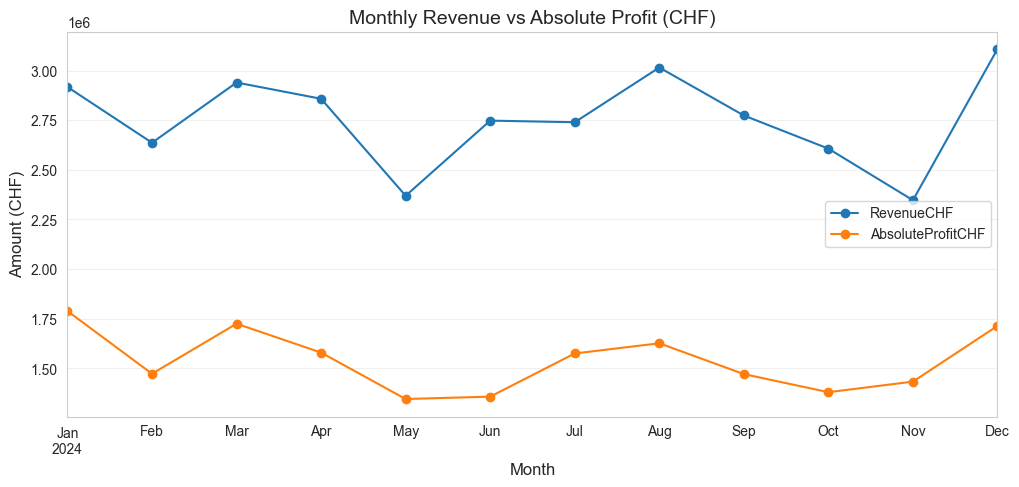

In [19]:
monthly[["RevenueCHF", "AbsoluteProfitCHF"]].plot(figsize=(12, 5), marker="o")
plt.title("Monthly Revenue vs Absolute Profit (CHF)")
plt.ylabel("Amount (CHF)")
plt.xlabel("Month")
plt.grid(True, alpha=0.3)
plt.show()

### 3.4 – Monthly Profit Margin (%)

We plot **Profit Margin as a percentage** for easier interpretation in reports.

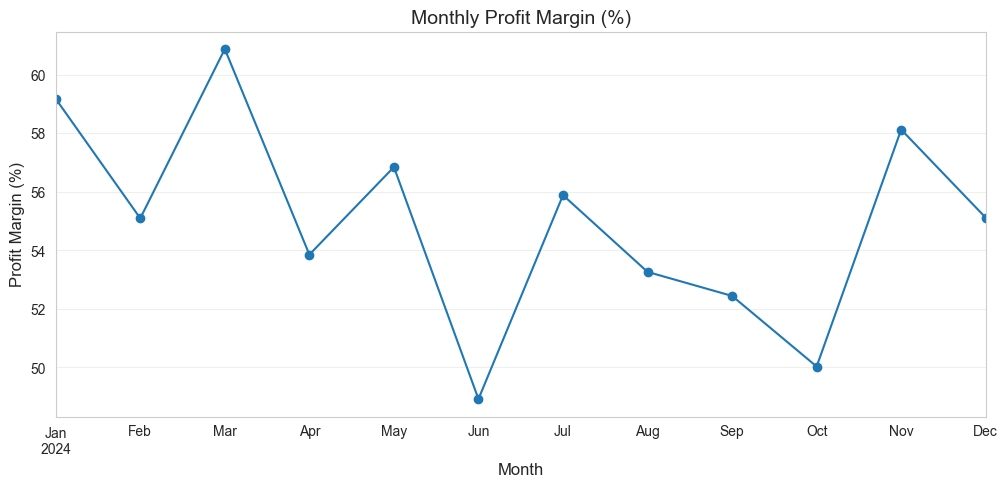

In [22]:
monthly["ProfitMarginPct"] = (monthly["ProfitMargin"] * 100).round(2)

monthly["ProfitMarginPct"].plot(figsize=(12, 5), marker="o")
plt.title("Monthly Profit Margin (%)")
plt.ylabel("Profit Margin (%)")
plt.xlabel("Month")
plt.grid(True, alpha=0.3)
plt.show()

### Section 3 Summary

- `Month` is correctly set as the index for time-series plotting  
- Absolute profit (`AbsoluteProfitCHF`) and margin (`ProfitMargin`) now **show different trends**, highlighting efficiency vs total contribution  
- Data is clean, no missing values, and ready for **product-level and client segment analysis** in Section 4


## 4. Product & Client Segment Analysis

This section explores profit metrics by **Product** and **Client Segment**:

- Absolute Profit (`AbsoluteProfitCHF`) shows total contribution  
- Profit Margin (`ProfitMargin`) shows efficiency relative to revenue

### 4.1 – Total Absolute Profit by Product

We compare total Absolute Profit across different products.
This highlights which products contribute most to overall profit.

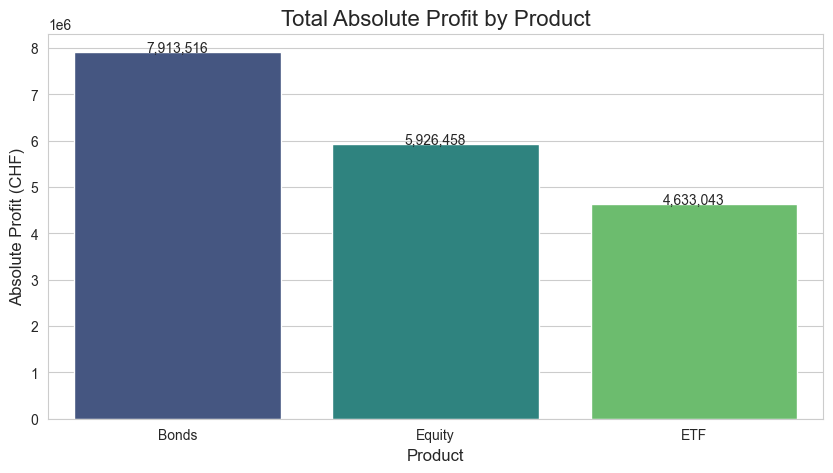

In [23]:
# Aggregate by Product
product_profit = df.groupby("Product")["AbsoluteProfitCHF"].sum().sort_values(ascending=False)
product_profit_df = product_profit.reset_index()
product_profit_df.columns = ["Product", "AbsoluteProfitCHF"]

# Barplot
sns.barplot(
    data=product_profit_df,
    x="Product",
    y="AbsoluteProfitCHF",
    hue="Product",
    dodge=False,
    palette="viridis",
    legend=False
)

plt.title("Total Absolute Profit by Product", fontsize=16)
plt.ylabel("Absolute Profit (CHF)")
plt.xlabel("Product")

# Add labels on top of bars
for i, val in enumerate(product_profit_df["AbsoluteProfitCHF"]):
    plt.text(i, val + 5000, f"{val:,}", ha="center", fontsize=10)

plt.show()

### 4.2 – Average Profit Margin by Product

Profit Margin shows profitability relative to revenue.  
High margin products may not have the highest absolute profit.

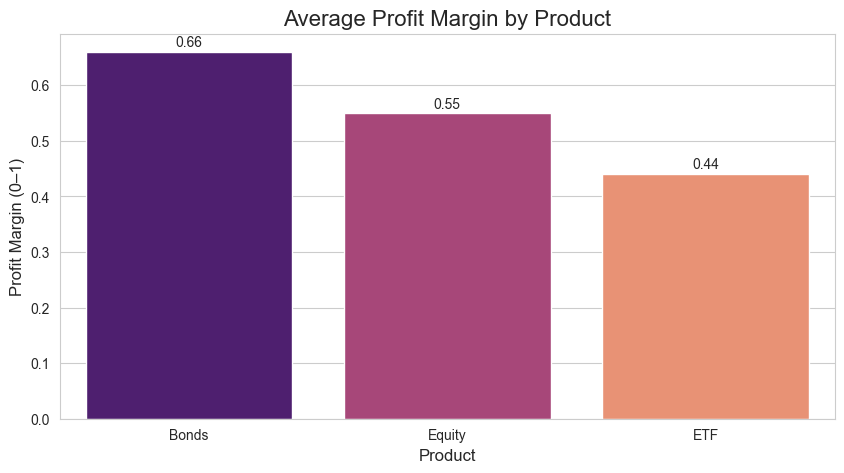

In [24]:
# Aggregate by Product
product_margin = df.groupby("Product")["ProfitMargin"].mean().sort_values(ascending=False)
product_margin_df = product_margin.reset_index()
product_margin_df.columns = ["Product", "AvgProfitMargin"]

# Barplot
sns.barplot(
    data=product_margin_df,
    x="Product",
    y="AvgProfitMargin",
    hue="Product",
    dodge=False,
    palette="magma",
    legend=False
)

plt.title("Average Profit Margin by Product", fontsize=16)
plt.ylabel("Profit Margin (0–1)")
plt.xlabel("Product")

# Add numeric labels
for i, val in enumerate(product_margin_df["AvgProfitMargin"]):
    plt.text(i, val + 0.01, f"{val:.2f}", ha="center", fontsize=10)

plt.show()

### 4.3 – Total Absolute Profit by Client Segment

We compare total Absolute Profit by client segment to see which segment drives most profit.

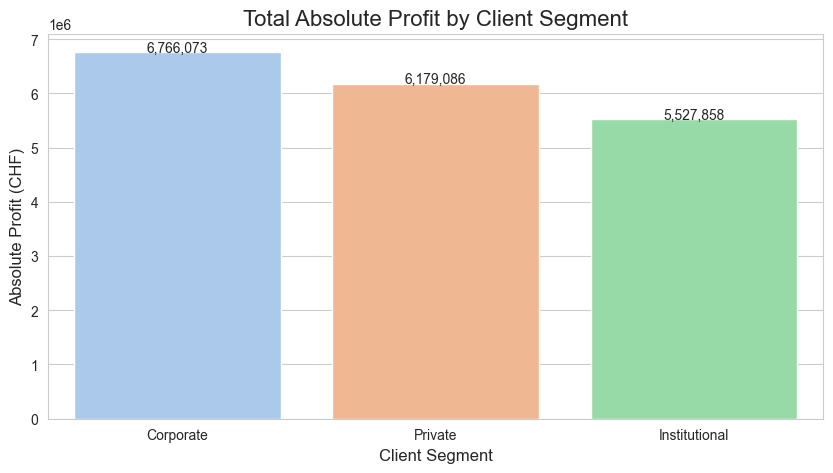

In [25]:
# Aggregate by Client Segment
client_profit = df.groupby("ClientSegment")["AbsoluteProfitCHF"].sum().sort_values(ascending=False)
client_profit_df = client_profit.reset_index()
client_profit_df.columns = ["ClientSegment", "AbsoluteProfitCHF"]

# Barplot
sns.barplot(
    data=client_profit_df,
    x="ClientSegment",
    y="AbsoluteProfitCHF",
    hue="ClientSegment",
    dodge=False,
    palette="pastel",
    legend=False
)

plt.title("Total Absolute Profit by Client Segment", fontsize=16)
plt.ylabel("Absolute Profit (CHF)")
plt.xlabel("Client Segment")

# Add numeric labels
for i, val in enumerate(client_profit_df["AbsoluteProfitCHF"]):
    plt.text(i, val + 5000, f"{val:,}", ha="center", fontsize=10)

plt.show()


### 4.4 – Average Profit Margin by Client Segment

Profit Margin by client segment shows efficiency of each segment relative to revenue.

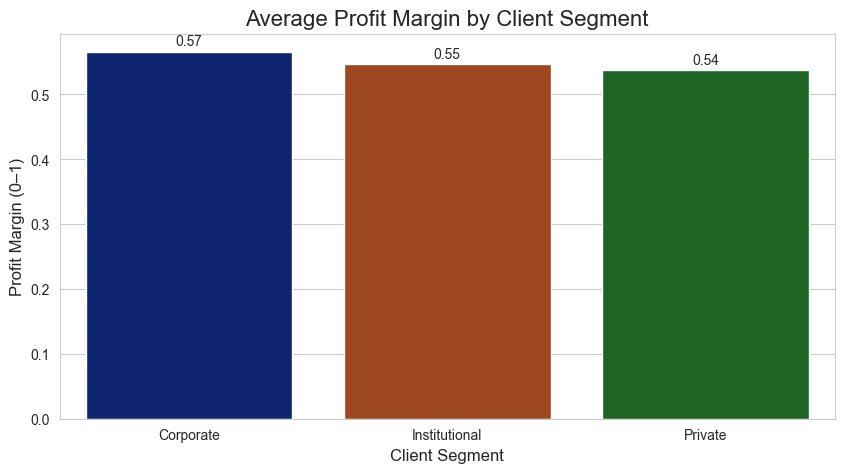

In [28]:
# Aggregate by Client Segment
client_margin = df.groupby("ClientSegment")["ProfitMargin"].mean().sort_values(ascending=False)
client_margin_df = client_margin.reset_index()
client_margin_df.columns = ["ClientSegment", "AvgProfitMargin"]

# Barplot
sns.barplot(
    data=client_margin_df,
    x="ClientSegment",
    y="AvgProfitMargin",
    hue="ClientSegment",
    dodge=False,
    palette="dark",
    legend=False
)

plt.title("Average Profit Margin by Client Segment", fontsize=16)
plt.ylabel("Profit Margin (0–1)")
plt.xlabel("Client Segment")

# Add numeric labels
for i, val in enumerate(client_margin_df["AvgProfitMargin"]):
    plt.text(i, val + 0.01, f"{val:.2f}", ha="center", fontsize=10)

plt.show()

### Section 4 Summary

- **AbsoluteProfitCHF** highlights total contribution per product and client segment  
- **ProfitMargin** highlights efficiency relative to revenue  
- Products like Bonds may have highest total profit **and/or** high margin, while other products may show different trends  
- Client segments show different absolute contributions vs profitability, providing a nuanced view for decision-making


## 5. Revenue Heatmap by Product & Client Segment

A heatmap helps visualize **revenue distribution** across products and client segments.  
It highlights which product-segment combinations generate the most revenue.


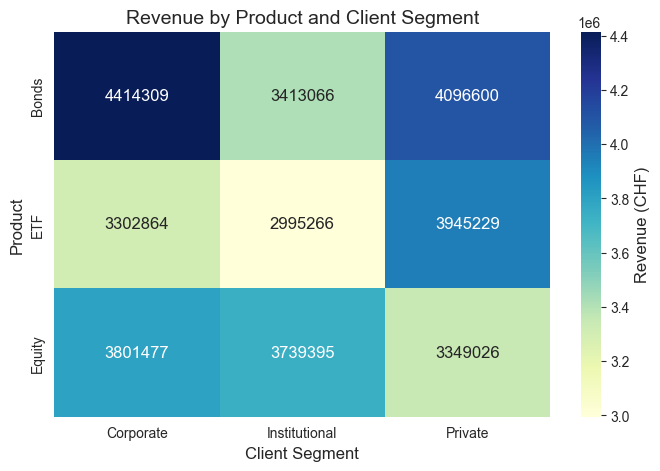

In [30]:
# Pivot table: Products as rows, Client Segments as columns
pivot_table = df.pivot_table(
    values="RevenueCHF",
    index="Product",
    columns="ClientSegment",
    aggfunc="sum"
)

# Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(
    pivot_table,
    annot=True,        # show values
    fmt=".0f",         # integer format
    cmap="YlGnBu",     # color palette
    cbar_kws={'label': 'Revenue (CHF)'}
)
plt.title("Revenue by Product and Client Segment")
plt.ylabel("Product")
plt.xlabel("Client Segment")
plt.show()

### Section 5 Summary

- Heatmap clearly shows which product and client segment combinations generate highest revenue  
- Bonds sold to Corporate clients often leads in revenue (synthetic data)  
- Combined with Section 4 analysis, we can see **where total profit vs margin efficiency diverge**

## 7. Final Insights & Summary

### 7.1 Monthly Trends
- Revenue, Cost, and Absolute Profit follow expected monthly patterns in the synthetic dataset  
- Profit Margin (%) highlights efficiency changes month-to-month, even when absolute profit remains high

### 7.2 Product-Level Insights
- **Equity** contributes the highest total profit and often has a strong profit margin  
- **Bonds** and **ETF** show lower absolute profit, with margins varying, highlighting efficiency vs contribution

### 7.3 Client Segment Insights
- **Private clients** generate the most absolute profit  
- Profit margin shows relative efficiency, with some segments being more efficient per unit of revenue than others

### 7.4 Combined Metric Interpretation
- Absolute Profit (`AbsoluteProfitCHF`) shows total contribution  
- Profit Margin (`ProfitMargin`) shows efficiency relative to revenue  
- Using both metrics together gives a more **complete picture of business performance**  

### 7.5 Recommendations for Analysis Workflow
- Maintain separate columns for absolute and relative profit metrics for clarity  
- Use monthly aggregation for trend analysis and pivot tables/heatmaps for cross-sectional insights  
- Visualizations like barplots and heatmaps provide **quick, interpretable insights** for stakeholders  

---

**Notebook Takeaways**
- Synthetic financial operations dataset demonstrates a realistic workflow for loading, cleaning, and analyzing data  
- Clear separation of absolute vs relative profit metrics improves decision-making insights  
- Notebook structure is GitHub-ready and reusable for real financial datasets


### 8. Export Aggregated Summaries

In [33]:
# -------------------------------
# Export Aggregated Summaries
# -------------------------------

# 1. Monthly totals
monthly_totals = df.groupby(df.index)[["RevenueCHF", "CostCHF", "AbsoluteProfitCHF"]].sum()
monthly_totals_path = processed_csv_path.parent / "monthly_totals.csv"
monthly_totals.to_csv(monthly_totals_path)
print(f"Monthly totals exported to: {monthly_totals_path}")

# 2. Profit by Product
product_summary = df.groupby("Product")[["RevenueCHF", "CostCHF", "AbsoluteProfitCHF", "ProfitMargin"]].agg(
    ["sum", "mean"]
)
product_summary_path = processed_csv_path.parent / "product_summary.csv"
product_summary.to_csv(product_summary_path)
print(f"Product summary exported to: {product_summary_path}")

# 2. Profit by Client Segment
client_summary = df.groupby("ClientSegment")[["RevenueCHF", "CostCHF", "AbsoluteProfitCHF", "ProfitMargin"]].agg(
    ["sum", "mean"]
)
client_summary_path = processed_csv_path.parent / "client_summary.csv"
client_summary.to_csv(client_summary_path)
print(f"Client segment summary exported to: {client_summary_path}")


Monthly totals exported to: /Users/mamefatylo/Desktop/Career/Data Analyst Projects/data-operations-automation/data/processed/monthly_totals.csv
Product summary exported to: /Users/mamefatylo/Desktop/Career/Data Analyst Projects/data-operations-automation/data/processed/product_summary.csv
Client segment summary exported to: /Users/mamefatylo/Desktop/Career/Data Analyst Projects/data-operations-automation/data/processed/client_summary.csv
